In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ode

# Primera Parte

La solución de la ecuación diferencial para un valor de I constante será:

$V(t) = E + R*I - (E+R*I - V_0) * e^{-t / tau}$

A) Si I = 0 la ecuación diferencial queda de la forma:

$V'(t) = \frac{1}{\tau} * (E - V(t)) = \frac{1}{10[ms]} * (-65[mV] - V(t)) = -6.5[mV] - \frac{1}{10} * V(t)$

Cuya ecuación se corresponde con la ecuación de una recta de pendiente negativa m = -0.1 y ordenada al origen b = -6.5

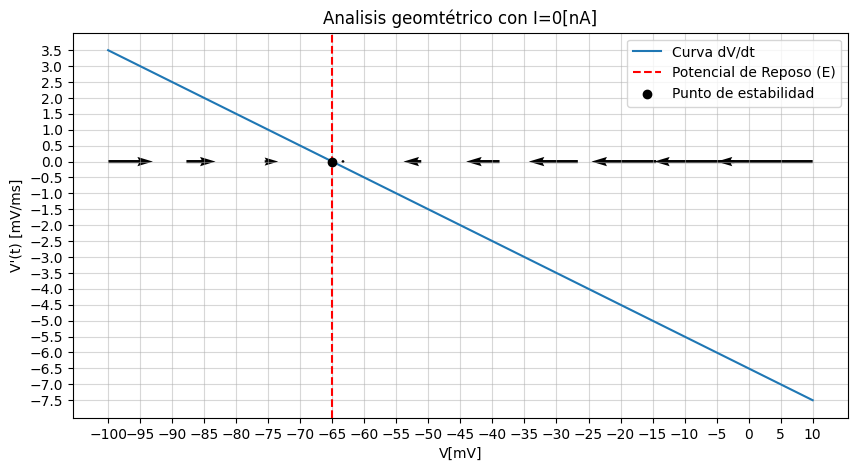

In [11]:
E = -65 #Potencial de reposo
V = np.linspace(-100, 10, 10)  #Intervalo de valores de V para graficar

b = -6.5 #Ordenada al origen
m = -0.1 #Pendiente
V_prima = b + m * V

plt.figure(figsize=(10,5))
plt.plot(V, V_prima, label='Curva dV/dt')
plt.axvline(x=E, color='r', linestyle='--', label='Potencial de Reposo (E)')
plt.scatter(x=E, y=b+m*E, c='black', label='Punto de estabilidad', zorder=2)
plt.quiver(V, np.zeros_like(V), V_prima, np.zeros_like(V_prima), width=0.004)
plt.xticks(np.arange(-100,15,5))
plt.yticks(np.arange(-7.5,4,0.5))
plt.title('Analisis geomtétrico con I=0[nA]')
plt.xlabel('V[mV]')
plt.ylabel("V'(t) [mV/ms]")
plt.legend()
plt.grid(alpha=0.5)
plt.show()

Para tiempos largos, $t \rightarrow \infty$, se observa que el sistema tiende a su posición de equilibrio en V($\infty$) = -65[mV], ya sea si la condición inicial se encuentra en valores de V'(t) positivos o negativos.

B) Si I = 2[nA] la ecuación diferencial queda de la forma:

$V'(t) = \frac{1}{\tau} * (E + R*I - V(t)) = \frac{1}{10[ms]} * (-65[mv] + 20[mV] - V(t)) = -4.5[mV] - \frac{1}{10} * V(t)$

Cuya ecuación se corresponde con la ecuación de una recta de pendiente negativa m = -0.1 y ordenada al origen b = -4.5

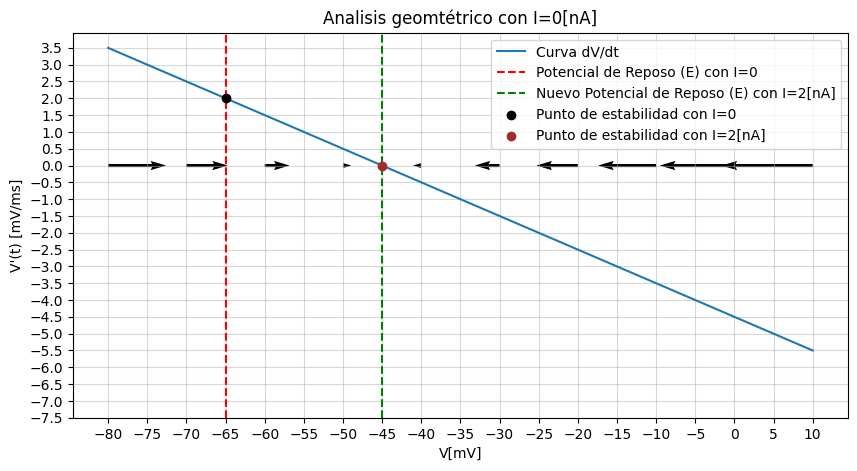

In [21]:
E = -65 #Potencial de reposo
V = np.linspace(-80, 10, 10)  #Intervalo de valores de V para graficar

b = -4.5 #Ordenada al origen
m = -0.1 #Pendiente
V_prima = b + m * V
I = 2#2e-6 # Corriente de entrada (mA) == 2nA
R = 10#1e10 # Resistencia (mohms) == 10Mohms

plt.figure(figsize=(10,5))
plt.plot(V, V_prima, label='Curva dV/dt')
plt.axvline(x=E, color='r', linestyle='--', label='Potencial de Reposo (E) con I=0')
plt.axvline(x=E+R*I, color='g', linestyle='--', label='Nuevo Potencial de Reposo (E) con I=2[nA]')
plt.scatter(x=E, y=b+m*E, c='black', label='Punto de estabilidad con I=0', zorder=2)
plt.scatter(x=E+R*I, y=b+m*(E+R*I), c='brown', label='Punto de estabilidad con I=2[nA]', zorder=2)
plt.quiver(V, np.zeros_like(V), V_prima, np.zeros_like(V_prima), width=0.004)
plt.xticks(np.arange(-80,15,5))
plt.yticks(np.arange(-7.5,4,0.5))
plt.title('Analisis geomtétrico con I=0[nA]')
plt.xlabel('V[mV]')
plt.ylabel("V'(t) [mV/ms]")
plt.legend()
plt.grid(alpha=0.5)
plt.show()

Para tiempos largos, $t \rightarrow \infty$, se observa que el sistema tiende a su nueva posición de equilibrio en V($\infty$) = -45[mV], debido a la corriente de polarización inicial de 2[nA], ya sea si la condición inicial se encuentra en valores de V'(t) positivos o negativos.

C) Resolver esta ODE de manera analítica para una corriente de entrada arbitraria $I(t)$ puede ser complicado, ya que la solución depende específicamente de la forma funcional de $I(t)$. Para obtener una solución general, podemos separar variables y escribir la ODE de la siguiente manera:

$\frac{dV}{E - V(t) + R * I(t)} = \frac{dt}{\tau}$

Luego, podemos intentar integrar ambos lados de la ecuación, pero la dificultad radica en la forma funcional de $I(t)$, que puede variar ampliamente. En la práctica, la resolución analítica podría requerir métodos avanzados de integración, y la solución podría no estar disponible en forma cerrada para muchas formas arbitrarias de $I(t)$.

La solución más general en este caso podría involucrar técnicas numéricas, como la integración numérica o la simulación por computadora, para resolver la ODE de manera aproximada dada una función específica $I(t)$. Esto implicaría discretizar el tiempo y usar métodos numéricos, como el método de Euler o el método de Runge-Kutta, para calcular el potencial de membrana $V$ en intervalos de tiempo discretos.

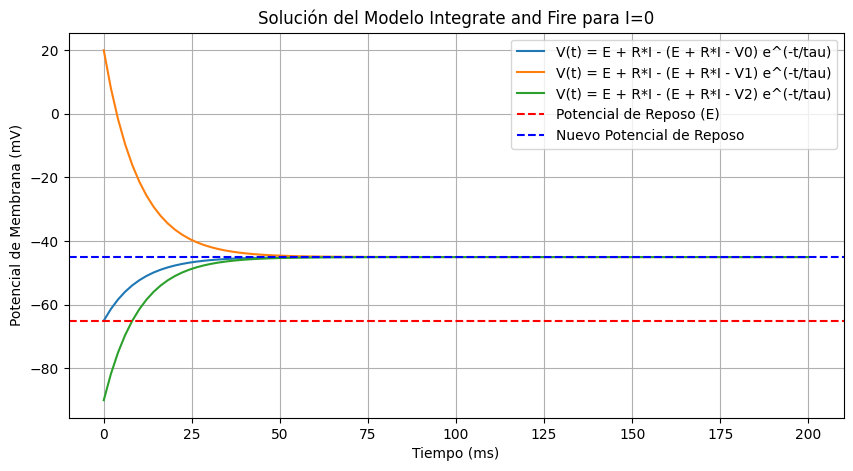

In [8]:
#D) Si I = 2 y V(0)=E=-65

#Parámetros
tau = 10  # Constante de tiempo de membrana (ms)
E = -65   # Potencial de reposo (mV)
V0 = E     # Condición inicial (mV)
V_1 = 20    # Condición inicial (mV)
V_2 = -90   # Condición inicial (mV)
t = np.linspace(0, 200, 100)  # Intervalo de tiempo de 0 a 100 ms
I = 2#2e-6 # Corriente de entrada (mA) == 2nA
R = 10#1e10 # Resistencia (mohms) == 10Mohms

# Solución analítica
V1 = E + R*I - (E + R*I - V0) * np.exp(-t / tau)
V2 = E + R*I - (E + R*I - V_1) * np.exp(-t / tau)
V3 = E + R*I - (E + R*I - V_2) * np.exp(-t / tau)

# Gráfico
plt.figure(figsize=(10, 5))
plt.plot(t, V1, label='V(t) = E + R*I - (E + R*I - V0) e^(-t/tau)')
plt.plot(t, V2, label='V(t) = E + R*I - (E + R*I - V1) e^(-t/tau)')
plt.plot(t, V3, label='V(t) = E + R*I - (E + R*I - V2) e^(-t/tau)')
plt.axhline(y=E, color='r', linestyle='--', label='Potencial de Reposo (E)')
plt.axhline(y=-45, color='b', linestyle='--', label='Nuevo Potencial de Reposo')
plt.xlabel('Tiempo (ms)')
plt.ylabel('Potencial de Membrana (mV)')
plt.title('Solución del Modelo Integrate and Fire para I=0')
plt.legend()
plt.grid()
plt.show()

Se observa que al introducir una corriente de polarización de 2[nA] se modifica el potencial de reposo de la neurona, pasando de los 65[mV] a los 45[mV]

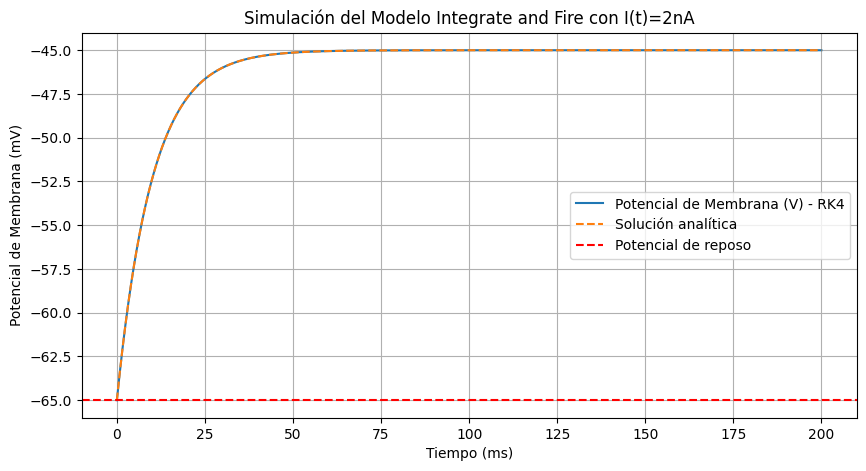

In [3]:
#E)

#Parámetros
tau = 10  # Constante de tiempo de membrana (ms)
E = -65   # Potencial de reposo (mV)
V0 = E     # Condición inicial (mV)
I = 2#2e-6 # Corriente de entrada (mA) == 2nA
R = 10#1e10 # Resistencia (mohms) == 10Mohms
h = 0.05 #Pasos de integración

start_time = 0.0
end_time = 200.0 # Tiempo máximo de simulación (ms)
parameters = [E, R, I, tau]
num_steps = int((end_time - start_time) / h)

# Definición de la función característica
def f(x, t, parameters):
    return (1/parameters[3]) * (parameters[0] - x + parameters[1] * parameters[2]) # (1/tau) * (E - V(t) + R*I)

#Aproximación por Runge-Kutta
t, x = ode.integrador_ode(ode.rk4, f, V0, start_time, end_time, num_steps, parameters, c=None) #parameters = [E, R, I, tau]

# Solución analítica
V = E + R*I - (E + R*I - V0) * np.exp(-t / tau)

# Graficar la solución
plt.figure(figsize=(10, 5))
plt.plot(t, x, label='Potencial de Membrana (V) - RK4')
plt.plot(t, V, label='Solución analítica', linestyle='--')
plt.axhline(y=E, color='r', linestyle='--', label='Potencial de reposo')
plt.xlabel('Tiempo (ms)')
plt.ylabel('Potencial de Membrana (mV)')
plt.title('Simulación del Modelo Integrate and Fire con I(t)=2nA')
plt.grid(True)
plt.legend()
plt.show()

Se observa una aproximación perfecta al usar un paso de integración de 0.05[ms] y el método de Runge-Kutta de 4º orden

# Segunda parte

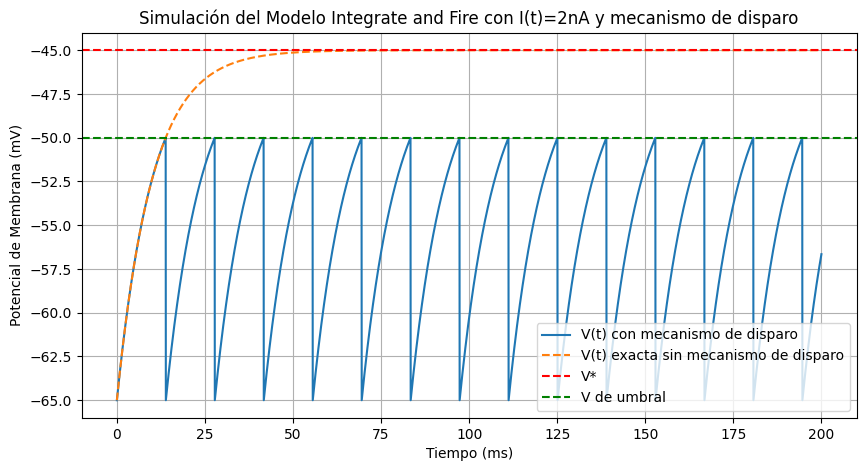

In [152]:
#F)

# Parámetros
tau = 10.0  # Constante de tiempo de membrana (ms)
E = -65.0   # Potencial de reposo (mV)
V0 = E      # Condición inicial (V(0) = E)
Vu = -50.0 # Tensión de umbral
h = 0.05   # Paso de integración (ms)
I = 2#2e-6 # Corriente de entrada (mA) == 2nA
R = 10#1e10 # Resistencia (mohms) == 10Mohms
start_time = 0.0
end_time = 200.0 # Tiempo máximo de simulación (ms)
parameters = [E, R, I, tau, Vu]
num_steps = int((end_time - start_time) / h)

# Definición de la función característica
def f(x, t, parameters):
    return (1/parameters[3]) * (parameters[0] - x + parameters[1] * parameters[2])

def condition(x, t, p):
    if x > p[4]:
        return p[0]
    else:
        return x

#Aproximación por Runge-Kutta
t, x = ode.integrador_ode(ode.rk4, f, V0, start_time, end_time, num_steps, parameters, c=condition) #parameters = [E, R, I, tau,Vu]

# Solución analítica
V = E + R*I - (E + R*I - V0) * np.exp(-t / tau)

V_0 = E + R*I # Valor de V para el cual dV/dt = 0 --> (1/tau)*(E - V + R*I)  = 0 --> E - V + R*I = 0 : Potecial de reposo

# Graficar la solución
plt.figure(figsize=(10, 5))
plt.plot(t, x, label='V(t) con mecanismo de disparo')
plt.plot(t, V, label='V(t) exacta sin mecanismo de disparo', linestyle='--')
plt.axhline(y=V_0, color='r', linestyle='--', label='V*')
plt.axhline(y=Vu, color='g', linestyle='--', label='V de umbral')
plt.xlabel('Tiempo (ms)')
plt.ylabel('Potencial de Membrana (mV)')
plt.title('Simulación del Modelo Integrate and Fire con I(t)=2nA y mecanismo de disparo')
plt.grid(True)
plt.legend()
plt.show()

La frecuencia de disparo obtenida numéricamente es: 72.20216606498195[Hz]
La frecuencia de disparo obtenida analíticamente es: 72.13475204444818[Hz]


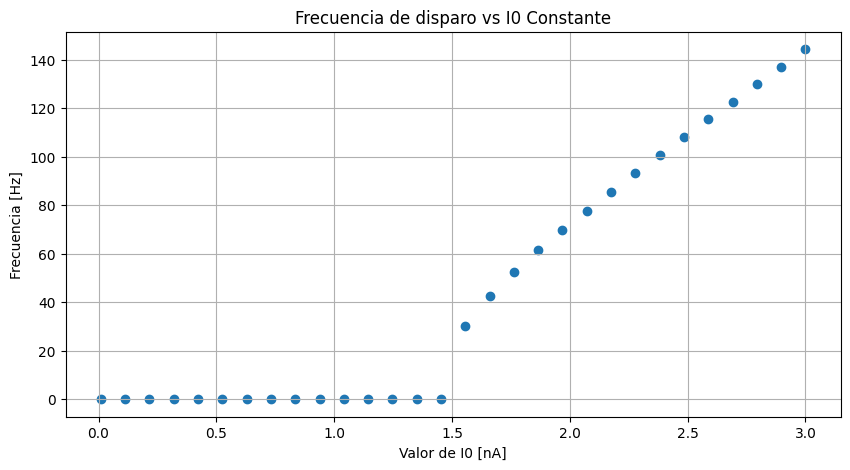

In [182]:
#G)
def get_freq(t, x):
    pos_max = np.argmax(x)
    periodo = t[pos_max]
    return (1/periodo)*1000 #Frecuencia en Hz
    
frequency = get_freq(t, x)
print(f'La frecuencia de disparo obtenida numéricamente es: {frequency}[Hz]')

analytic_per = tau * np.log((R*I)/(E + R*I - Vu)) #Ver hoja para análisis matemático
analytic_freq = 1000/analytic_per #Frecuencia en Hz
print(f'La frecuencia de disparo obtenida analíticamente es: {analytic_freq}[Hz]')

#Graficar la frecuencia en función de I
freq_values = []
I_values = np.linspace(0.01, 3, 30)
for I_d in I_values:
    cond = R*I_d + E > Vu #Condición para que el logaritmo sea válido
    if cond:
        freq = 1000/(tau * np.log((R*I_d)/(R*I_d + E - Vu)))
        freq_values.append(freq)
    else:
        freq_values.append(0.0)
    
plt.figure(figsize=(10,5))
plt.scatter(I_values, freq_values)
plt.title('Frecuencia de disparo vs I0 Constante')
plt.xlabel('Valor de I0 [nA]')
plt.ylabel('Frecuencia [Hz]')
plt.xticks(np.arange(0,I_values.max()+0.5, 0.5))
plt.grid()
plt.show()

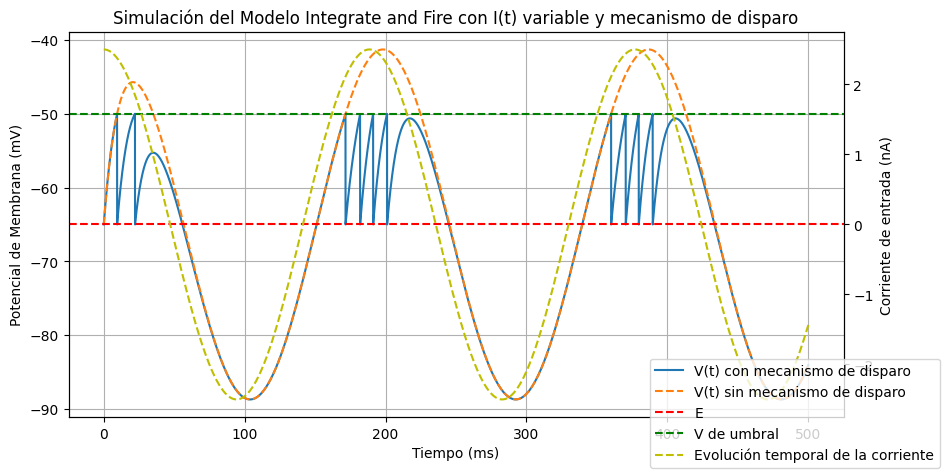

In [21]:
#H)

# Parámetros
tau = 10.0  # Constante de tiempo de membrana (ms)
E = -65.0   # Potencial de reposo (mV)
V0 = E#-50.0      # Condición inicial (ej: V(0) = E)
Vu = -50.0 # Tensión de umbral
h = 0.05   # Paso de integración (ms)
R = 10#1e10 # Resistencia (mohms) == 10Mohms
start_time = 0.0
end_time = 500.0 # Tiempo máximo de simulación (ms)
num_steps = int((end_time - start_time) / h)

#Definición de la corriente I(t)
def I(t):
    #return 2 * np.ones_like(t) #Condición I(t) = 2
    return 2.5 * np.cos(t/30)

parameters = [E, R, I, tau, Vu]

# Definición de la función característica
def f(x, t, parameters):
    return (1/parameters[3]) * (parameters[0] - x + parameters[1] * parameters[2](t)) #(1/tau) * (E - x + R*I)

def condition(x, t, p):
    if x > p[4]:
        return p[0]
    else:
        return x

#Aproximación por Runge-Kutta
t, x = ode.integrador_ode(ode.rk4, f, V0, start_time, end_time, num_steps, parameters, c=condition) #Con mecanismo de disparo
t1, x1 = ode.integrador_ode(ode.rk4, f, V0, start_time, end_time, num_steps, parameters, c=None) #Sin mecanismo de disparo

# Graficar la solución
fig, axs = plt.subplots(figsize=(10,5))

axs.plot(t, x, label='V(t) con mecanismo de disparo')
axs.plot(t1, x1, label='V(t) sin mecanismo de disparo', linestyle='--')
axs.axhline(y=E, color='r', linestyle='--', label='E')
axs.axhline(y=Vu, color='g', linestyle='--', label='V de umbral')
axs.set_xlabel('Tiempo (ms)')
axs.set_ylabel('Potencial de Membrana (mV)')
axs.set_title('Simulación del Modelo Integrate and Fire con I(t) variable y mecanismo de disparo')
axs.grid(True)

ax2 = axs.twinx()
ax2.plot(t, I(t), label='Evolución temporal de la corriente', c='y', linestyle='--')
ax2.set_ylabel('Corriente de entrada (nA)')

fig.legend(loc='lower right')
plt.show()

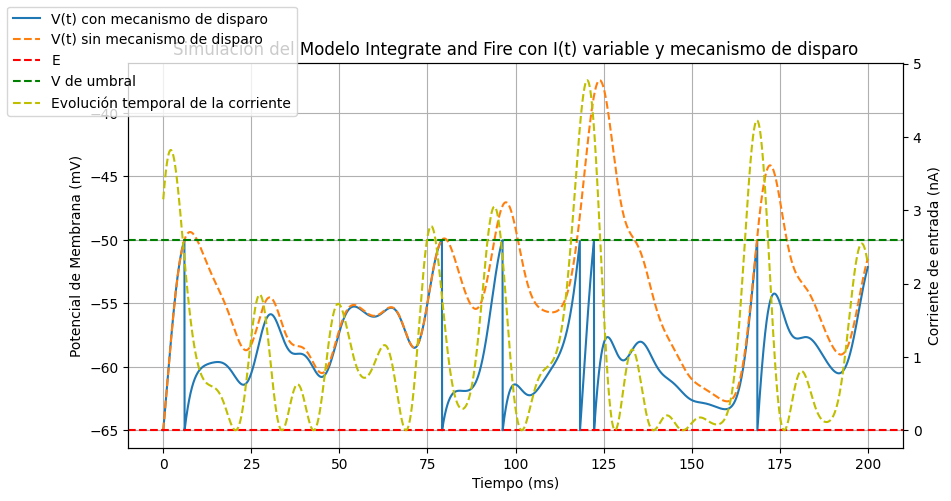

In [22]:
#I)

# Parámetros
tau = 10.0  # Constante de tiempo de membrana (ms)
E = -65.0   # Potencial de reposo (mV)
V0 = E#-50.0      # Condición inicial (V(0) = E)
Vu = -50.0 # Tensión de umbral
h = 0.05   # Paso de integración (ms)
R = 10#1e10 # Resistencia (mohms) == 10Mohms
start_time = 0.0
end_time = 200.0 # Tiempo máximo de simulación (ms)
num_steps = int((end_time - start_time) / h)

#Definición de la corriente I(t)
def I(t):
    return 0.35 * (np.cos(t/3) + np.sin(t/5) + np.cos(t/7) + np.sin(t/11) + np.cos(t/13))**2

parameters = [E, R, I, tau, Vu]

# Definición de la función característica
def f(x, t, parameters):
    return (1/parameters[3]) * (parameters[0] - x + parameters[1] * parameters[2](t))

def condition(x, t, p):
    if x > p[4]:
        return p[0]
    else:
        return x

#Aproximación por Runge-Kutta
t, x = ode.integrador_ode(ode.rk4, f, V0, start_time, end_time, num_steps, parameters, c=condition) #Con mecanismo de disparo
t1, x1 = ode.integrador_ode(ode.rk4, f, V0, start_time, end_time, num_steps, parameters, c=None) #Sin mecanismo de disparo

# Solución analítica
#V = E + R*I(t) - (E + R*I(t) - V0) * np.exp(-t / tau) #Sólo es correcta cuando I es constante

# Graficar la solución
fig, axs = plt.subplots(figsize=(10,5))

axs.plot(t, x, label='V(t) con mecanismo de disparo')
axs.plot(t1, x1, label='V(t) sin mecanismo de disparo', linestyle='--')
axs.axhline(y=E, color='r', linestyle='--', label='E')
axs.axhline(y=Vu, color='g', linestyle='--', label='V de umbral')
axs.set_xlabel('Tiempo (ms)')
axs.set_ylabel('Potencial de Membrana (mV)')
axs.set_title('Simulación del Modelo Integrate and Fire con I(t) variable y mecanismo de disparo')
axs.grid(True)

ax2 = axs.twinx()
ax2.plot(t, I(t), label='Evolución temporal de la corriente', c='y', linestyle='--')
ax2.set_ylabel('Corriente de entrada (nA)')

fig.legend(loc='upper left')
plt.show()

Cuando existen picos de corriente, se producen disparos en la neurona (el valor de tensión alcanza al valor de tensión umbral). Los picos se producen a intervalos irregulares dado que la corriente de entrada es irregular, pero a mayor amplitud de la corriente, mayor frecuencia de disparos (picos más juntos)